1. Problem Statement : 
2. Load The dataset
3. EDA : data info, checking features catergorical and numerical, the bivariate, univariate, multivaraite analysis,
         check missing values and outliers.
    
4. feature engineering : handle null values by using knn imputer, simple imputer, handle outliers by using IQR OR zscore method, 
                          transform the categorical values of the relevant features into numerical ones by using encoding.
5. feature selection : in feature selection we use filter method.
   
   Types of Feature Selection:

**Filter Method:** Based on the statistical measure of the relationship between the feature and the target variable. Features with a high correlation are selected.
**Wrapper Method:** Based on the evaluation of the feature subset using a specific machine learning algorithm. The feature subset that results in the best performance is selected.
**Embedded Method:** Based on the feature selection as part of the training process of the machine learning algorithm.

6. Model Selection : try several model for this project but we get good accuracy by using Decision Tree.

7. Model Evaluation : using some matrics we find the MSE.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder  # we do encoding for categorical columns, onehotencoding and Ordinal encoding
from sklearn.impute import KNNImputer,SimpleImputer   # missing values replace with knn imputers.
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [2]:
df = pd.read_csv("CFAF_C2011-2017_Code_E.csv")
df.head()

,Year,Mode,SCTGGroup,OrigCMA,OrigProv,OrigCtry,DestCMA,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value
0,2011,TF,OTHMF,559,ON,CA,825,AB,CA,59,"28,284.20","58,508.90","220,471.00","105,783.50","560,727.50"
1,2011,TF,OTHMF,559,ON,CA,835,AB,CA,127,"138,919.10","100,204.10","478,640.00","523,088.60","1,634,366.40"
2,2011,TF,OTHMF,559,ON,CA,933,BC,CA,42,"22,850.60","52,947.40","196,805.00","107,261.20","1,258,757.70"
3,2011,TF,OTHMF,600,MB,CA,421,QC,CA,49,"612,882.10","292,874.20","185,448.00","2,374,926.80","8,193,369.40"
4,2011,TF,OTHMF,600,MB,CA,537,ON,CA,17,"15,362.50","13,966.20","36,060.00","32,817.00","299,427.20"


In [3]:
df.shape

(58721, 15)

In [4]:
df.isna().sum()

Year            0
Mode            0
SCTGGroup       0
OrigCMA         0
OrigProv        0
OrigCtry        0
DestCMA         0
DestProv        0
DestCtry        0
Shipments    1560
Weight       1560
Revenue      1560
Distance     1560
TonneKm      1560
Value        1560
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58721 entries, 0 to 58720
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       58721 non-null  int64 
 1   Mode       58721 non-null  object
 2   SCTGGroup  58721 non-null  object
 3   OrigCMA    58721 non-null  int64 
 4   OrigProv   58721 non-null  object
 5   OrigCtry   58721 non-null  object
 6   DestCMA    58721 non-null  int64 
 7   DestProv   58721 non-null  object
 8   DestCtry   58721 non-null  object
 9   Shipments  57161 non-null  object
 10  Weight     57161 non-null  object
 11  Revenue    57161 non-null  object
 12  Distance   57161 non-null  object
 13  TonneKm    57161 non-null  object
 14  Value      57161 non-null  object
dtypes: int64(3), object(12)
memory usage: 6.7+ MB


In [6]:
df.dtypes

Year          int64
Mode         object
SCTGGroup    object
OrigCMA       int64
OrigProv     object
OrigCtry     object
DestCMA       int64
DestProv     object
DestCtry     object
Shipments    object
Weight       object
Revenue      object
Distance     object
TonneKm      object
Value        object
dtype: object

In [7]:
cat_df = df.select_dtypes(include='object')
num_df = df.select_dtypes(include= "int64")

### Catrgorical DF

In [8]:
cat_df

,Mode,SCTGGroup,OrigProv,OrigCtry,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value
0,TF,OTHMF,ON,CA,AB,CA,59,"28,284.20","58,508.90","220,471.00","105,783.50","560,727.50"
1,TF,OTHMF,ON,CA,AB,CA,127,"138,919.10","100,204.10","478,640.00","523,088.60","1,634,366.40"
2,TF,OTHMF,ON,CA,BC,CA,42,"22,850.60","52,947.40","196,805.00","107,261.20","1,258,757.70"
3,TF,OTHMF,MB,CA,QC,CA,49,"612,882.10","292,874.20","185,448.00","2,374,926.80","8,193,369.40"
4,TF,OTHMF,MB,CA,ON,CA,17,"15,362.50","13,966.20","36,060.00","32,817.00","299,427.20"
...,...,...,...,...,...,...,...,...,...,...,...,...
58716,TF,PLCHM,ON,CA,MB,CA,712.6,"1,676,208.90","487,791.70","1,684,656.20","4,036,721.60","14,417,142.70"
58717,TF,PLCHM,ON,CA,BC,CA,"1,706.20","3,899,398.10","1,232,055.40","7,419,028.60","16,149,636.10","22,885,575.00"
58718,TF,PLCHM,ON,CA,PE,CA,5,"3,084.50","1,417.40","8,230.00","5,077.10","13,809.90"
58719,TF,PLCHM,ON,CA,QC,CA,"2,439.00","5,432,221.60","889,574.30","1,192,550.90","2,530,356.30","29,435,070.30"


### 1. Mode

In [9]:
cat_df["Mode"].unique()

# ordinal encoding

array(['TF', 'RL', 'AR'], dtype=object)

In [10]:
cat_df["Mode"].value_counts()

TF    39081
RL    17497
AR     2143
Name: Mode, dtype: int64

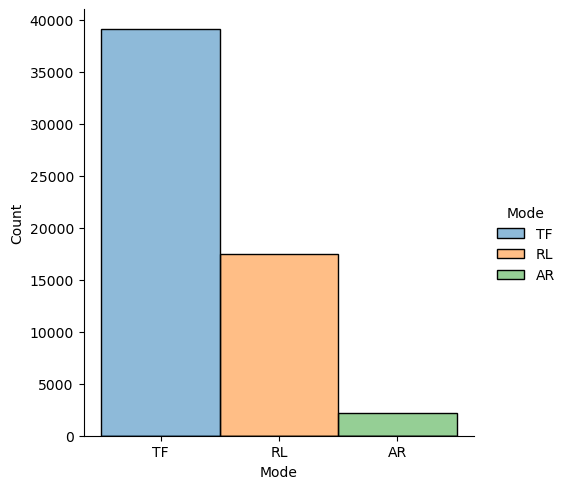

In [11]:
sns.displot(data=cat_df,x='Mode',kind='hist', hue = cat_df['Mode'])  #Univariate anaylsis
plt.show()

### SCTGGroup

In [12]:
cat_df["SCTGGroup"].unique()

array(['OTHMF', 'PLCHM', 'AGRI', 'MNRLS', 'BMETL', 'WASTE', 'MISC',
       'TRANS', 'FRPAP', 'FUELS', 'COAL', 'FOOD'], dtype=object)

In [13]:
cat_df["SCTGGroup"].isna().sum()

0

<Figure size 2800x800 with 0 Axes>

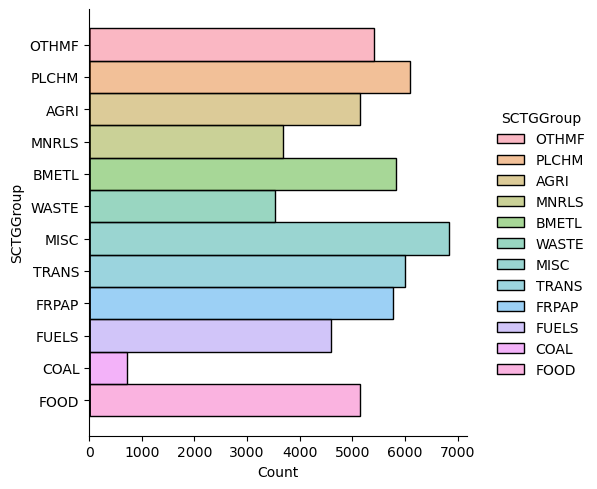

In [14]:
plt.figure(figsize=(28,8))
sns.displot(data=cat_df,y='SCTGGroup',kind='hist', hue= 'SCTGGroup')
plt.show()

# onehot encoding

## OrigProv

In [15]:
cat_df["OrigProv"].unique()

# one hot encoding

array(['ON', 'MB', 'SK', 'UM', 'NS', 'QC', 'AB', 'BC', 'NB', 'NL', 'NT',
       'NU', 'OI', 'PE', 'YT'], dtype=object)

In [16]:
cat_df["OrigProv"].isna().sum()

0

<Figure size 2800x800 with 0 Axes>

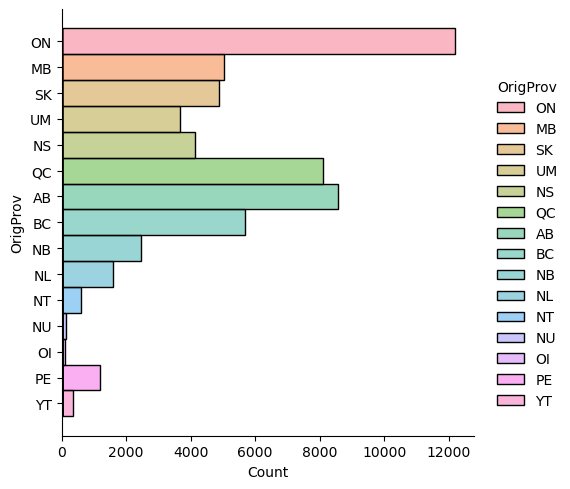

In [17]:
plt.figure(figsize=(28,8))
sns.displot(data=cat_df,y='OrigProv',kind='hist', hue= 'OrigProv')
plt.show()

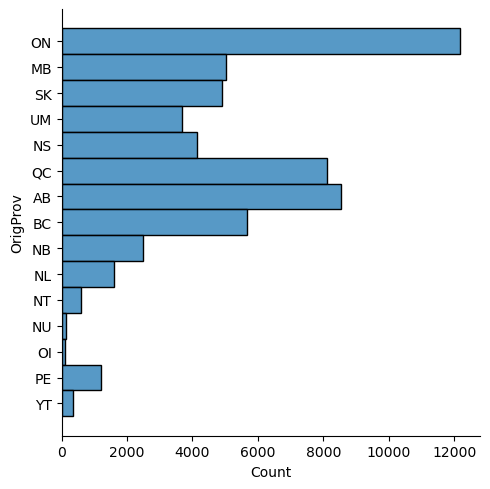

In [18]:
sns.displot(data=cat_df,y='OrigProv',kind='hist')
plt.show()

### OrigCtry

In [19]:
cat_df["OrigCtry"].unique()

# ordinal encoding

array(['CA', 'UM', 'OI'], dtype=object)

In [20]:
cat_df["OrigCtry"].isna().sum()


0

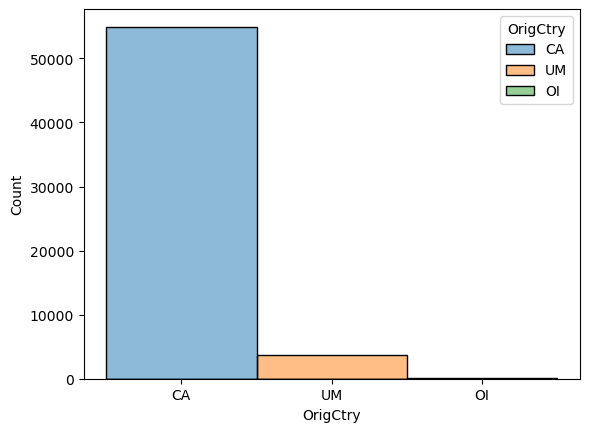

In [21]:
sns.histplot(data=cat_df,x="OrigCtry",hue='OrigCtry')
plt.show()

### DestProv	

In [22]:
cat_df["DestProv"].unique()
# one hot encoding

array(['AB', 'BC', 'QC', 'ON', 'MB', 'SK', 'NB', 'UM', 'NS', 'NT', 'PE',
       'NL', 'YT', 'OI', 'NU'], dtype=object)

In [23]:
cat_df["DestProv"].isna().sum()

0

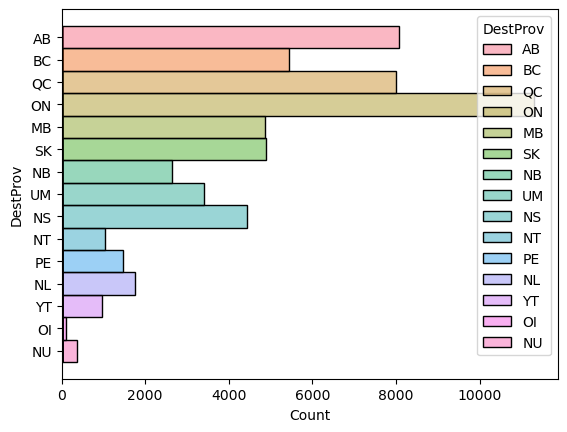

In [24]:
sns.histplot(data=cat_df,y="DestProv",hue='DestProv')
plt.show()

In [25]:
cat_df.head()

,Mode,SCTGGroup,OrigProv,OrigCtry,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value
0,TF,OTHMF,ON,CA,AB,CA,59,"28,284.20","58,508.90","220,471.00","105,783.50","560,727.50"
1,TF,OTHMF,ON,CA,AB,CA,127,"138,919.10","100,204.10","478,640.00","523,088.60","1,634,366.40"
2,TF,OTHMF,ON,CA,BC,CA,42,"22,850.60","52,947.40","196,805.00","107,261.20","1,258,757.70"
3,TF,OTHMF,MB,CA,QC,CA,49,"612,882.10","292,874.20","185,448.00","2,374,926.80","8,193,369.40"
4,TF,OTHMF,MB,CA,ON,CA,17,"15,362.50","13,966.20","36,060.00","32,817.00","299,427.20"


## DestCtry

In [26]:
cat_df["DestCtry"].unique()

# ordinal Encoding

array(['CA', 'UM', 'OI'], dtype=object)

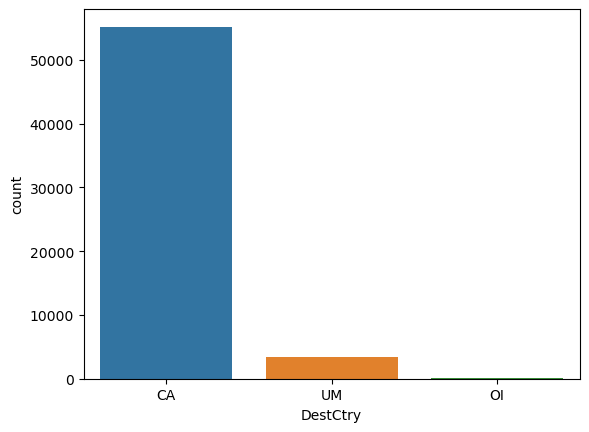

In [27]:
sns.countplot(data=cat_df,x="DestCtry")
plt.show()

## Shipments

In [28]:
cat_df["Shipments"].isna().sum()

# 1560 are null values available in this column
# handle null values and typecasting

1560

In [29]:
cat_df["Shipments"].shape[0]

58721

In [30]:
cat_df["Shipments"].isna().sum()/cat_df["Shipments"].shape[0]*100

# 2% null values in the Shipment column

2.6566305069736553

### Weight

In [31]:
cat_df["Weight"].nunique()

50633

In [32]:
cat_df["Weight"].dtype

dtype('O')

In [33]:
cat_df["Weight"].isna().sum()

# Handle missing values and datatype

1560

In [34]:
cat_df["Weight"].isna().sum()/cat_df["Weight"].shape[0]*100

# 2% null values in the Shipment column

2.6566305069736553

### Revenue

In [35]:
cat_df["Revenue"].isna().sum()

1560

In [36]:
cat_df["Revenue"].dtype
 
# Handle missing values and datatype

dtype('O')

In [37]:
cat_df["Revenue"].isna().sum()/cat_df["Revenue"].shape[0]*100

# 2% null values in the Revenue column

2.6566305069736553

## Distance

In [38]:
cat_df["Distance"].unique()

array(['220,471.00', '478,640.00', '196,805.00', ..., '7,419,028.60',
       '1,192,550.90', '71,358.70'], dtype=object)

In [39]:
cat_df["Distance"].isna().sum()

1560

In [40]:
cat_df["Distance"].dtype

dtype('O')

In [41]:
cat_df["Distance"].isna().sum()/cat_df["Distance"].shape[0]*100

# 2% null values in the Shipment column

2.6566305069736553

## TonneKm	

In [42]:
cat_df["TonneKm"].isna().sum()

# Handle null values

1560

In [43]:
cat_df["TonneKm"].dtype

dtype('O')

## Value

In [44]:
cat_df["Value"].isna().sum()

1560

In [45]:
cat_df.head()

,Mode,SCTGGroup,OrigProv,OrigCtry,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value
0,TF,OTHMF,ON,CA,AB,CA,59,"28,284.20","58,508.90","220,471.00","105,783.50","560,727.50"
1,TF,OTHMF,ON,CA,AB,CA,127,"138,919.10","100,204.10","478,640.00","523,088.60","1,634,366.40"
2,TF,OTHMF,ON,CA,BC,CA,42,"22,850.60","52,947.40","196,805.00","107,261.20","1,258,757.70"
3,TF,OTHMF,MB,CA,QC,CA,49,"612,882.10","292,874.20","185,448.00","2,374,926.80","8,193,369.40"
4,TF,OTHMF,MB,CA,ON,CA,17,"15,362.50","13,966.20","36,060.00","32,817.00","299,427.20"


## Numerical DF

In [46]:
num_df.head()

,Year,OrigCMA,DestCMA
0,2011,559,825
1,2011,559,835
2,2011,559,933
3,2011,600,421
4,2011,600,537


In [47]:
num_df.isna().sum()

Year       0
OrigCMA    0
DestCMA    0
dtype: int64

## feature engineering

### ordinal encding for Mode, origCtry,DestCtry

In [48]:
cat_df["Mode"].unique()

array(['TF', 'RL', 'AR'], dtype=object)

In [49]:
ord_enc = OrdinalEncoder(categories=[['TF', 'RL', 'AR']])
ord_enc.fit(cat_df[["Mode"]])
cat_df["Mode"] = ord_enc.fit_transform(cat_df[["Mode"]])
cat_df.head(5)

,Mode,SCTGGroup,OrigProv,OrigCtry,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value
0,0.0,OTHMF,ON,CA,AB,CA,59,"28,284.20","58,508.90","220,471.00","105,783.50","560,727.50"
1,0.0,OTHMF,ON,CA,AB,CA,127,"138,919.10","100,204.10","478,640.00","523,088.60","1,634,366.40"
2,0.0,OTHMF,ON,CA,BC,CA,42,"22,850.60","52,947.40","196,805.00","107,261.20","1,258,757.70"
3,0.0,OTHMF,MB,CA,QC,CA,49,"612,882.10","292,874.20","185,448.00","2,374,926.80","8,193,369.40"
4,0.0,OTHMF,MB,CA,ON,CA,17,"15,362.50","13,966.20","36,060.00","32,817.00","299,427.20"


In [50]:
cat_df["Mode"].dtype

dtype('float64')

In [51]:
cat_df["OrigCtry"].unique()

array(['CA', 'UM', 'OI'], dtype=object)

In [52]:
ord_enc = OrdinalEncoder(categories=[['CA', 'UM', 'OI']])
ord_enc.fit(cat_df[["OrigCtry"]])
cat_df["OrigCtry"] = ord_enc.fit_transform(cat_df[["OrigCtry"]])
cat_df.head()

,Mode,SCTGGroup,OrigProv,OrigCtry,DestProv,DestCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value
0,0.0,OTHMF,ON,0.0,AB,CA,59,"28,284.20","58,508.90","220,471.00","105,783.50","560,727.50"
1,0.0,OTHMF,ON,0.0,AB,CA,127,"138,919.10","100,204.10","478,640.00","523,088.60","1,634,366.40"
2,0.0,OTHMF,ON,0.0,BC,CA,42,"22,850.60","52,947.40","196,805.00","107,261.20","1,258,757.70"
3,0.0,OTHMF,MB,0.0,QC,CA,49,"612,882.10","292,874.20","185,448.00","2,374,926.80","8,193,369.40"
4,0.0,OTHMF,MB,0.0,ON,CA,17,"15,362.50","13,966.20","36,060.00","32,817.00","299,427.20"


In [53]:
cat_df.drop("DestCtry",axis=1,inplace=True)

### One-Hot-Encoding

In [54]:
ohe = OneHotEncoder()
array = ohe.fit_transform(cat_df[["SCTGGroup"]]).toarray()
df2 = pd.DataFrame(array,columns=cat_df["SCTGGroup"].unique())
df2

,OTHMF,PLCHM,AGRI,MNRLS,BMETL,WASTE,MISC,TRANS,FRPAP,FUELS,COAL,FOOD
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
58716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
58717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
58718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
58719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
cat_df = cat_df.join(df2)
cat_df.drop("SCTGGroup",axis=1,inplace=True)

In [56]:
cat_df.head()

,Mode,OrigProv,OrigCtry,DestProv,Shipments,Weight,Revenue,Distance,TonneKm,Value,...,AGRI,MNRLS,BMETL,WASTE,MISC,TRANS,FRPAP,FUELS,COAL,FOOD
0,0.0,ON,0.0,AB,59,"28,284.20","58,508.90","220,471.00","105,783.50","560,727.50",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,ON,0.0,AB,127,"138,919.10","100,204.10","478,640.00","523,088.60","1,634,366.40",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,ON,0.0,BC,42,"22,850.60","52,947.40","196,805.00","107,261.20","1,258,757.70",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,MB,0.0,QC,49,"612,882.10","292,874.20","185,448.00","2,374,926.80","8,193,369.40",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,MB,0.0,ON,17,"15,362.50","13,966.20","36,060.00","32,817.00","299,427.20",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [57]:
ohe = OneHotEncoder()
array = ohe.fit_transform(cat_df[["OrigProv"]]).toarray()
df1 = pd.DataFrame(array,columns=cat_df["OrigProv"].unique())
df1

,ON,MB,SK,UM,NS,QC,AB,BC,NB,NL,NT,NU,OI,PE,YT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [58]:
cat_df = cat_df.join(df1)
cat_df.drop("OrigProv",axis=1,inplace=True)
cat_df.head()

,Mode,OrigCtry,DestProv,Shipments,Weight,Revenue,Distance,TonneKm,Value,OTHMF,...,QC,AB,BC,NB,NL,NT,NU,OI,PE,YT
0,0.0,0.0,AB,59,"28,284.20","58,508.90","220,471.00","105,783.50","560,727.50",0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,AB,127,"138,919.10","100,204.10","478,640.00","523,088.60","1,634,366.40",0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,BC,42,"22,850.60","52,947.40","196,805.00","107,261.20","1,258,757.70",0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,QC,49,"612,882.10","292,874.20","185,448.00","2,374,926.80","8,193,369.40",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,ON,17,"15,362.50","13,966.20","36,060.00","32,817.00","299,427.20",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
cat_df.drop("DestProv",axis=1,inplace=True)

In [60]:
cat_df.head()

,Mode,OrigCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value,OTHMF,PLCHM,...,QC,AB,BC,NB,NL,NT,NU,OI,PE,YT
0,0.0,0.0,59,"28,284.20","58,508.90","220,471.00","105,783.50","560,727.50",0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,127,"138,919.10","100,204.10","478,640.00","523,088.60","1,634,366.40",0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,42,"22,850.60","52,947.40","196,805.00","107,261.20","1,258,757.70",0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,49,"612,882.10","292,874.20","185,448.00","2,374,926.80","8,193,369.40",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,17,"15,362.50","13,966.20","36,060.00","32,817.00","299,427.20",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58721 entries, 0 to 58720
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mode       58721 non-null  float64
 1   OrigCtry   58721 non-null  float64
 2   Shipments  57161 non-null  object 
 3   Weight     57161 non-null  object 
 4   Revenue    57161 non-null  object 
 5   Distance   57161 non-null  object 
 6   TonneKm    57161 non-null  object 
 7   Value      57161 non-null  object 
 8   OTHMF      58721 non-null  float64
 9   PLCHM      58721 non-null  float64
 10  AGRI       58721 non-null  float64
 11  MNRLS      58721 non-null  float64
 12  BMETL      58721 non-null  float64
 13  WASTE      58721 non-null  float64
 14  MISC       58721 non-null  float64
 15  TRANS      58721 non-null  float64
 16  FRPAP      58721 non-null  float64
 17  FUELS      58721 non-null  float64
 18  COAL       58721 non-null  float64
 19  FOOD       58721 non-null  float64
 20  ON    

## handle missing values and datatypes

In [62]:
cat_df.head()

,Mode,OrigCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value,OTHMF,PLCHM,...,QC,AB,BC,NB,NL,NT,NU,OI,PE,YT
0,0.0,0.0,59,"28,284.20","58,508.90","220,471.00","105,783.50","560,727.50",0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,127,"138,919.10","100,204.10","478,640.00","523,088.60","1,634,366.40",0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,42,"22,850.60","52,947.40","196,805.00","107,261.20","1,258,757.70",0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,49,"612,882.10","292,874.20","185,448.00","2,374,926.80","8,193,369.40",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,17,"15,362.50","13,966.20","36,060.00","32,817.00","299,427.20",0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
cat_df["Shipments"] = cat_df["Shipments"].str.replace(",","")
cat_df["Weight"] = cat_df["Weight"].str.replace(",","")
cat_df["Revenue"] = cat_df["Revenue"].str.replace(",","")
cat_df["Distance"] = cat_df["Distance"].str.replace(",","")
cat_df["TonneKm"] = cat_df["TonneKm"].str.replace(",","")
cat_df["Value"] = cat_df["Value"].str.replace(",","")

In [64]:
cat_df["Shipments"] = cat_df["Shipments"].astype(float)
cat_df["Weight"] = cat_df["Weight"].astype(float)
cat_df["Revenue"] = cat_df["Revenue"].astype(float)
cat_df["Distance"] = cat_df["Distance"].astype(float)
cat_df["TonneKm"] = cat_df["TonneKm"].astype(float)
cat_df["Value"] = cat_df["Value"].astype(float)

In [65]:
cat_df.head()

,Mode,OrigCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value,OTHMF,PLCHM,...,QC,AB,BC,NB,NL,NT,NU,OI,PE,YT
0,0.0,0.0,59.0,28284.2,58508.9,220471.0,105783.5,560727.5,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,127.0,138919.1,100204.1,478640.0,523088.6,1634366.4,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,42.0,22850.6,52947.4,196805.0,107261.2,1258757.7,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,49.0,612882.1,292874.2,185448.0,2374926.8,8193369.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,17.0,15362.5,13966.2,36060.0,32817.0,299427.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# KNN-imputer

### fill nan values with knn imputer

In [66]:
from sklearn.impute import KNNImputer

In [67]:
knn = KNNImputer()
array = knn.fit_transform(cat_df)
cat_df1 = pd.DataFrame(array,columns=cat_df.columns)
cat_df1.head()

,Mode,OrigCtry,Shipments,Weight,Revenue,Distance,TonneKm,Value,OTHMF,PLCHM,...,QC,AB,BC,NB,NL,NT,NU,OI,PE,YT
0,0.0,0.0,59.0,28284.2,58508.9,220471.0,105783.5,560727.5,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,127.0,138919.1,100204.1,478640.0,523088.6,1634366.4,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,42.0,22850.6,52947.4,196805.0,107261.2,1258757.7,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,49.0,612882.1,292874.2,185448.0,2374926.8,8193369.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,17.0,15362.5,13966.2,36060.0,32817.0,299427.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
df = num_df.join(cat_df1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58721 entries, 0 to 58720
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       58721 non-null  int64  
 1   OrigCMA    58721 non-null  int64  
 2   DestCMA    58721 non-null  int64  
 3   Mode       58721 non-null  float64
 4   OrigCtry   58721 non-null  float64
 5   Shipments  58721 non-null  float64
 6   Weight     58721 non-null  float64
 7   Revenue    58721 non-null  float64
 8   Distance   58721 non-null  float64
 9   TonneKm    58721 non-null  float64
 10  Value      58721 non-null  float64
 11  OTHMF      58721 non-null  float64
 12  PLCHM      58721 non-null  float64
 13  AGRI       58721 non-null  float64
 14  MNRLS      58721 non-null  float64
 15  BMETL      58721 non-null  float64
 16  WASTE      58721 non-null  float64
 17  MISC       58721 non-null  float64
 18  TRANS      58721 non-null  float64
 19  FRPAP      58721 non-null  float64
 20  FUELS 

### Handle Outliers

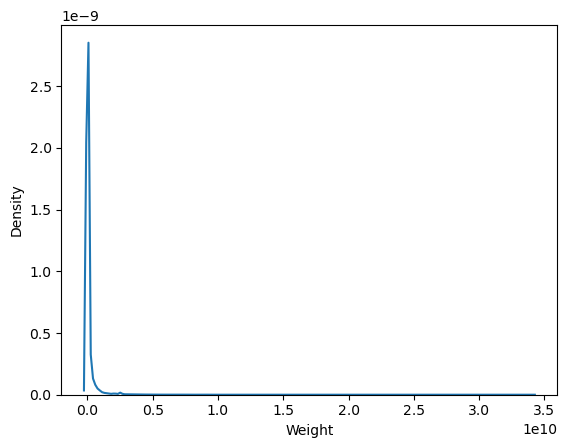

In [69]:
sns.kdeplot(data=df,x="Weight")
plt.show()

In [70]:
# # Log transform a single column 
# df['Weight'] = np.log(df['Weight'] 


# Log transform multiple columns in dataframe 
df1 = np.around(df[['Weight','Revenue','Distance','TonneKm']].apply(lambda x: np.log(x)),2)
df.drop(['Weight','Revenue','Distance','TonneKm'],axis=1,inplace=True)


C:\Users\Mahesh\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [71]:
df

,Year,OrigCMA,DestCMA,Mode,OrigCtry,Shipments,Value,OTHMF,PLCHM,AGRI,...,QC,AB,BC,NB,NL,NT,NU,OI,PE,YT
0,2011,559,825,0.0,0.0,59.0,560727.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2011,559,835,0.0,0.0,127.0,1634366.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2011,559,933,0.0,0.0,42.0,1258757.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2011,600,421,0.0,0.0,49.0,8193369.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011,600,537,0.0,0.0,17.0,299427.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58716,2014,500,600,0.0,0.0,712.6,14417142.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58717,2014,500,900,0.0,0.0,1706.2,22885575.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58718,2014,532,110,0.0,0.0,5.0,13809.9,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58719,2014,532,462,0.0,0.0,2439.0,29435070.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


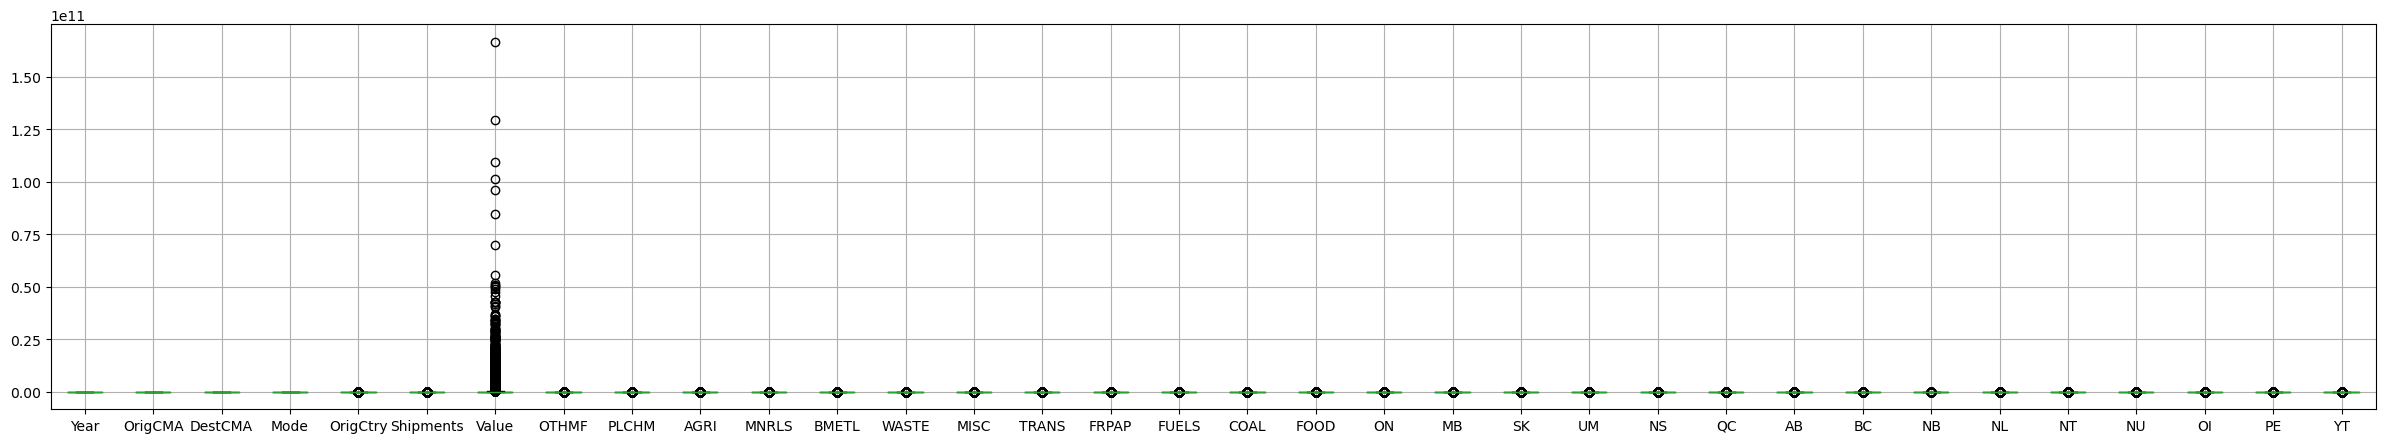

In [72]:
plt.figure(figsize=(30,5))
df.boxplot()
plt.show()

In [73]:
for i in df.iloc[:,34: ] :
    sns.kdeplot(data=df.columns,x=df[i])
    plt.show()
    print(i)
    
# after handling outliers data is normally distributed

### checking target variable outliers

In [74]:
df["Value"].value_counts().sort_values()

3.121582e+07      1
6.718856e+06      1
2.167200e+03      1
2.317090e+04      1
2.741069e+08      1
               ... 
1.215167e+09    133
1.085553e+09    161
1.524984e+09    171
7.048808e+08    221
1.725122e+09    246
Name: Value, Length: 55830, dtype: int64

In [75]:
df[['Value']]

,Value
0,560727.5
1,1634366.4
2,1258757.7
3,8193369.4
4,299427.2
...,...
58716,14417142.7
58717,22885575.0
58718,13809.9
58719,29435070.3


In [76]:
# # Log transform a single column 
df['Value'] = np.around(np.log(df['Value']),2)
df[['Value']]

C:\Users\Mahesh\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Value
0,13.24
1,14.31
2,14.05
3,15.92
4,12.61
...,...
58716,16.48
58717,16.95
58718,9.53
58719,17.20


In [77]:
df['Shipments'] = np.around(np.log(df['Shipments']),2)
df[['Shipments']]

,Shipments
0,4.08
1,4.84
2,3.74
3,3.89
4,2.83
...,...
58716,6.57
58717,7.44
58718,1.61
58719,7.80


### Check Multicollinearity

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
df_new = df[np.isfinite(df).all(1)]

In [80]:
df_new.columns

Index(['Year', 'OrigCMA', 'DestCMA', 'Mode', 'OrigCtry', 'Shipments', 'Value',
       'OTHMF', 'PLCHM', 'AGRI', 'MNRLS', 'BMETL', 'WASTE', 'MISC', 'TRANS',
       'FRPAP', 'FUELS', 'COAL', 'FOOD', 'ON', 'MB', 'SK', 'UM', 'NS', 'QC',
       'AB', 'BC', 'NB', 'NL', 'NT', 'NU', 'OI', 'PE', 'YT'],
      dtype='object')

In [81]:
x = df_new.drop(['SK','OrigCtry','ON','COAL','UM','MNRLS','WASTE','MB','PLCHM','NL','FUELS','FOOD','BMETL','OI','MISC','Value'],axis=1)
y = df_new['Value']

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=42)

In [83]:
x_train.shape

(46903, 18)

In [84]:
x_test.shape

(11726, 18)

In [85]:
y_train.shape

(46903,)

In [86]:
y_test.shape

(11726,)

In [87]:
lrmodel = LinearRegression()
lrmodel.fit(x_train,y_train)

LinearRegression()

In [88]:
# Testing
y_pred_test = lrmodel.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
mae = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)

R2_Score = r2_score(y_test,y_pred_test)
print("R2 score",R2_Score)

MSE 2.3884992286668307
mae 1.1844416127117754
R2 score 0.8705415593522929


In [89]:
# Training
y_pred_train = lrmodel.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
mae = mean_absolute_error(y_train,y_pred_train)
print("mae",mae)

R2_Score = r2_score(y_train,y_pred_train)
print("R2 score",R2_Score)

MSE 2.356258723762954
mae 1.1756785036091262
R2 score 0.8740372348902847


# Overfitting Issue Occur

# Knn Algorithm

In [90]:
knn_reg = KNeighborsRegressor() # k=5,p=2 (E.D)
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

In [91]:
# Testing
y_pred_test = knn_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
mae = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)

R2_Score = r2_score(y_test,y_pred_test)
print("R2 score",R2_Score)

MSE 2.989492732048439
mae 1.2519542896128264
R2 score 0.837967262968445


In [92]:
# Training
y_pred_train = knn_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
mae = mean_absolute_error(y_train,y_pred_train)
print("mae",mae)

R2_Score = r2_score(y_train,y_pred_train)
print("R2 score",R2_Score)

MSE 1.89943842082596
mae 0.9928410975843763
R2 score 0.8984583003428537


### after using Knn regression overfitting issue is solved

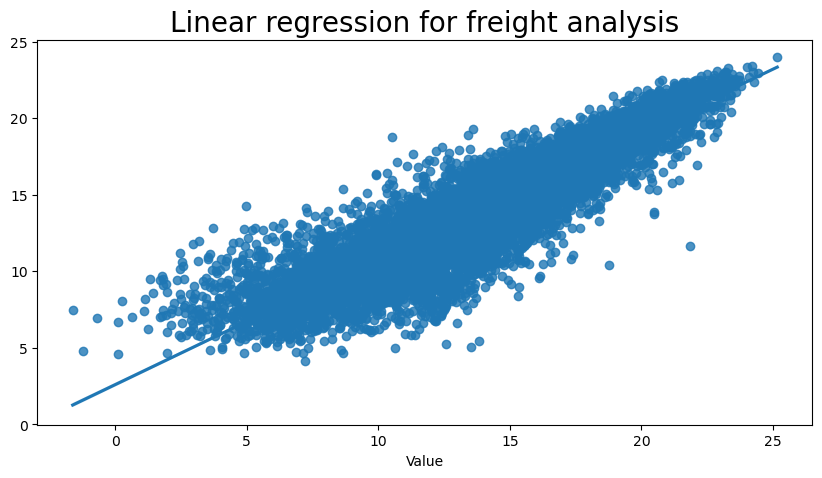

In [93]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred_test)
plt.title('Linear regression for freight analysis', fontsize = 20)
plt.show()

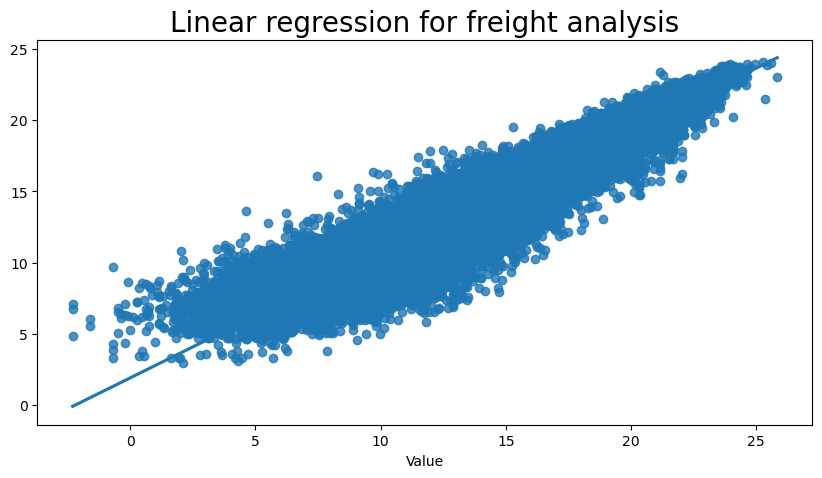

In [94]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_train,y=y_pred_train)
plt.title('Linear regression for freight analysis', fontsize = 20)
plt.show()

## hyperparameter tuning in KNN

In [95]:
r2_train_list = []
r2_test_list = []
k_values = range(2,30)

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=2)
    knn_reg.fit(x_train,y_train)
    #training
    r2_train = knn_reg.score(x_train,y_train)
    r2_train_list.append(r2_train)
    
    #testing
    r2_test = knn_reg.score(x_test,y_test)
    r2_test_list.append(r2_test)
    
plt.figure(figsize=(20,8))
plt.plot(k_values,r2_train_list,color='green')
plt.plot(k_values,r2_test_list)
plt.xlabel('k_values')
plt.ylabel('Accuracy')
plt.title("Comparison between training and testing accuracies")

Text(0.5, 1.0, 'Comparison between training and testing accuracies')

In [96]:
knn_reg = KNeighborsRegressor(n_neighbors=4,p=1)
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4, p=1)

In [97]:
# Testing
y_pred_test = knn_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE",mse)
mae = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)

R2_Score = r2_score(y_test,y_pred_test)
print("R2 score",R2_Score)

MSE 2.7624987639646936
mae 1.205001492410029
R2 score 0.8502705054362935


In [98]:
# Training
y_pred_train = knn_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE",mse)
mae = mean_absolute_error(y_train,y_pred_train)
print("mae",mae)

R2_Score = r2_score(y_train,y_pred_train)

print("R2 score",R2_Score)

MSE 1.5947526509498327
mae 0.9101223802315417
R2 score 0.9147464361388615


## Decision Tree

In [99]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [100]:
# Training
y_pred_train = dt.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("mse",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print("mae",mae)

r2_value = r2_score(y_train,y_pred_train)
print("r2 score",r2_value)

mse 0.0402423068176165
mae 0.025974315786481524
r2 score 0.9978486945469871


In [101]:
# Testing
y_pred_test = dt.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("mse",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)
r2_value = r2_score(y_test,y_pred_test)
print("r2 score",r2_value)

mse 2.9901095933538
mae 1.217253539143783
r2 score 0.8379338286253523


In [102]:
dt_reg = DecisionTreeRegressor()
hyp = { 'criterion':['squared_error','absolute_error'],'max_depth':np.arange(2,7),'min_samples_split':np.arange(2,5),
                     'min_samples_leaf':np.arange(2,4),'random_state':[41,42,43,45]}
rdscv = RandomizedSearchCV(dt_reg,hyp,cv=5)
rdscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': array([2, 3, 4, 5, 6]),
                                        'min_samples_leaf': array([2, 3]),
                                        'min_samples_split': array([2, 3, 4]),
                                        'random_state': [41, 42, 43, 45]})

In [103]:
rdscv.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_leaf=3, random_state=45)

In [104]:
dt_reg = DecisionTreeRegressor(max_depth=40, min_samples_leaf=10, min_samples_split=10,
                      random_state=42)
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=40, min_samples_leaf=10, min_samples_split=10,
                      random_state=42)

In [105]:
# Testing
y_pred_test = dt_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print("mse",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print("mae",mae)
r2_value = r2_score(y_test,y_pred_test)
print("r2 score",r2_value)

mse 1.7526152558628594
mae 0.9610835429419106
r2 score 0.9050069452163777


In [106]:
# Training
y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("mse",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print("mae",mae)

r2_value = r2_score(y_train,y_pred_train)
print("r2 score",r2_value)

mse 1.1699697461755065
mae 0.7800590730784449
r2 score 0.9374548207135658
